Welcome to the trending franchies 500 project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/ChadSim/firstPro/main/franchise500.csv'
df = pd.read_csv(url, encoding= 'latin1')

### A little bit about the data:

This year marks the 45th annual Franchise 500—still the world’s first, best, and most comprehensive franchise ranking. If you’re looking to buy a franchise, this is your definitive guide. If you’re a franchisor, this is where your hard work is recognized.

In [3]:
df.columns

Index(['Entreupeneur Profile', '2016 Rank', 'Company', 'Category Detail',
       'Franchise 500 Rank', 'Initial Investment', 'High',
       'Change In Units 1 Yr', 'Change In Units 3 Yr', 'Founded',
       'Franchising Since', 'Corporate Address', 'Ceo', 'Parent Company',
       'About', 'Net Worth Requirement', 'Liquid Cash Requirement',
       'Initial Franchise Fee', 'Financing Options', 'Veteran Incentives',
       'Previous Ranks', 'Highest Rank', 'Lowest Rank',
       'Where Seeking Franchisees', 'Operations'],
      dtype='object')

In [4]:
df.head(2)

,Entreupeneur Profile,2016 Rank,Company,Category Detail,Franchise 500 Rank,Initial Investment,High,Change In Units 1 Yr,Change In Units 3 Yr,Founded,...,Net Worth Requirement,Liquid Cash Requirement,Initial Franchise Fee,Financing Options,Veteran Incentives,Previous Ranks,Highest Rank,Lowest Rank,Where Seeking Franchisees,Operations
0,https://www.entrepreneur.com/franchises/jimmyj...,1,Jimmy John's Sandwiches,Sandwiches,#1 Franchise 500,"$325,500","$555,000",+9.0% +205 UNITS,+22.5% +514 UNITS,1983,...,"$300,000","$80,000","$35,000",Jimmy John's Sandwiches has relationships with...,NaN,NaN,1.0,85.0,throughout the US,Training Onsite: 20 days;Training at headquart...
1,https://www.entrepreneur.com/franchises/hampto...,2,Hampton by Hilton,Midprice hotels,#2 Franchise 500,"$4,213,600","$14,896,500",+4.4% +90 UNITS,+5.7% +117 UNITS,1983,...,NaN,NaN,"$75,000",Hampton by Hilton has relationships with third...,NaN,NaN,1.0,48.0,worldwide,Training Onsite: varies;Training at headquarte...


# Cleaning the data
Cleaning the '$' signs and other non numerical figures, so that we can change the type into integers and then work with numbers. 

In [5]:
#spend['Actual_PO'] = spend['Actual_PO'].replace({'\$':''}, regex = True)  
df['Liquid Cash Requirement'] = df['Liquid Cash Requirement'].replace({'\$':''}, regex = True)  
df['Initial Franchise Fee'] = df['Initial Franchise Fee'].replace({'\$':''}, regex = True)  
df['Net Worth Requirement'] = df['Net Worth Requirement'].replace({'\$':''}, regex = True) 
df['Initial Investment'] = df['Initial Investment'].replace({'\$':''}, regex = True) 
df['High'] = df['High'].replace({'\$':''}, regex = True) 
df['Net Worth Requirement'] = df['Net Worth Requirement'].replace({'\$':''}, regex = True) 

In [6]:
df.head(1)

,Entreupeneur Profile,2016 Rank,Company,Category Detail,Franchise 500 Rank,Initial Investment,High,Change In Units 1 Yr,Change In Units 3 Yr,Founded,...,Net Worth Requirement,Liquid Cash Requirement,Initial Franchise Fee,Financing Options,Veteran Incentives,Previous Ranks,Highest Rank,Lowest Rank,Where Seeking Franchisees,Operations
0,https://www.entrepreneur.com/franchises/jimmyj...,1,Jimmy John's Sandwiches,Sandwiches,#1 Franchise 500,"325,500","555,000",+9.0% +205 UNITS,+22.5% +514 UNITS,1983,...,"300,000","80,000","35,000",Jimmy John's Sandwiches has relationships with...,NaN,NaN,1.0,85.0,throughout the US,Training Onsite: 20 days;Training at headquart...


Shoot, 'change in units' have two values in each tuple, we will separate them than insert them into two eperate columns.

In [7]:
df[['Percentage1', 'Units1']] = df['Change In Units 1 Yr'].str.extract(r'([+-]?\d*\.\d+|\d+)%\s*([+-]?\d+)\s*UNITS')
df[['Percentage3', 'Units3']] = df['Change In Units 3 Yr'].str.extract(r'([+-]?\d*\.\d+|\d+)%\s*([+-]?\d+)\s*UNITS')
df.head(2)

,Entreupeneur Profile,2016 Rank,Company,Category Detail,Franchise 500 Rank,Initial Investment,High,Change In Units 1 Yr,Change In Units 3 Yr,Founded,...,Veteran Incentives,Previous Ranks,Highest Rank,Lowest Rank,Where Seeking Franchisees,Operations,Percentage1,Units1,Percentage3,Units3
0,https://www.entrepreneur.com/franchises/jimmyj...,1,Jimmy John's Sandwiches,Sandwiches,#1 Franchise 500,"325,500","555,000",+9.0% +205 UNITS,+22.5% +514 UNITS,1983,...,NaN,NaN,1.0,85.0,throughout the US,Training Onsite: 20 days;Training at headquart...,+9.0,+205,+22.5,+514
1,https://www.entrepreneur.com/franchises/hampto...,2,Hampton by Hilton,Midprice hotels,#2 Franchise 500,"4,213,600","14,896,500",+4.4% +90 UNITS,+5.7% +117 UNITS,1983,...,NaN,NaN,1.0,48.0,worldwide,Training Onsite: varies;Training at headquarte...,+4.4,+90,+5.7,+117


Lets remove the '+' sign

In [8]:
df['Percentage1'] = df['Percentage1'].str.replace('+', '')
df['Units1'] = df['Units1'].str.replace('+', '')
df['Percentage3'] = df['Percentage3'].str.replace('+', '')
df['Units3'] = df['Units3'].str.replace('+', '')
df.head(2)

/var/folders/83/q0czyh392sg4dhb55y_9m5300000gn/T/ipykernel_3216/3503439158.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Percentage1'] = df['Percentage1'].str.replace('+', '')
/var/folders/83/q0czyh392sg4dhb55y_9m5300000gn/T/ipykernel_3216/3503439158.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Units1'] = df['Units1'].str.replace('+', '')
/var/folders/83/q0czyh392sg4dhb55y_9m5300000gn/T/ipykernel_3216/3503439158.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Percentage3'] = df['Percentage3']

,Entreupeneur Profile,2016 Rank,Company,Category Detail,Franchise 500 Rank,Initial Investment,High,Change In Units 1 Yr,Change In Units 3 Yr,Founded,...,Veteran Incentives,Previous Ranks,Highest Rank,Lowest Rank,Where Seeking Franchisees,Operations,Percentage1,Units1,Percentage3,Units3
0,https://www.entrepreneur.com/franchises/jimmyj...,1,Jimmy John's Sandwiches,Sandwiches,#1 Franchise 500,"325,500","555,000",+9.0% +205 UNITS,+22.5% +514 UNITS,1983,...,NaN,NaN,1.0,85.0,throughout the US,Training Onsite: 20 days;Training at headquart...,9.0,205,22.5,514
1,https://www.entrepreneur.com/franchises/hampto...,2,Hampton by Hilton,Midprice hotels,#2 Franchise 500,"4,213,600","14,896,500",+4.4% +90 UNITS,+5.7% +117 UNITS,1983,...,NaN,NaN,1.0,48.0,worldwide,Training Onsite: varies;Training at headquarte...,4.4,90,5.7,117


In [9]:
## Let's search for 'nulls'

In [10]:
df.isnull().sum().to_frame('nulls')

,nulls
Entreupeneur Profile,0
2016 Rank,0
Company,0
Category Detail,0
Franchise 500 Rank,0
Initial Investment,0
High,1
Change In Units 1 Yr,134
Change In Units 3 Yr,117
Founded,0


## We have nulls in our data, we need to get rid of them so that we can make a correlation.

In [11]:
new_df_1yr = df[['Franchise 500 Rank','Company', 'Percentage1', 'Units1', 'Initial Franchise Fee']].dropna().reset_index()
new_df_3yr = df[['Franchise 500 Rank','Company', 'Percentage3', 'Units3', 'Initial Franchise Fee']].dropna().reset_index()
new_df_1yr.head(2)

,index,Franchise 500 Rank,Company,Percentage1,Units1,Initial Franchise Fee
0,0,#1 Franchise 500,Jimmy John's Sandwiches,9.0,205,"35,000"
1,1,#2 Franchise 500,Hampton by Hilton,4.4,90,"75,000"


Checking typs

In [12]:
new_df_1yr.info()
#sns.regplot(data=new_df_1yr, x='Initial Franchise Fee', y='Units1')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   index                  362 non-null    int64 
 1   Franchise 500 Rank     362 non-null    object
 2   Company                362 non-null    object
 3   Percentage1            362 non-null    object
 4   Units1                 362 non-null    object
 5   Initial Franchise Fee  362 non-null    object
dtypes: int64(1), object(5)
memory usage: 17.1+ KB


I need to change obeject into integers

In [13]:
new_df_1yr.shape

(362, 6)

In [14]:
new_df_1yr['Units1'] = new_df_1yr['Units1'].fillna(0).astype(int)
new_df_1yr['Percentage1'] = new_df_1yr['Percentage1'].fillna(0).astype(float)
#new_df_1yr['Initial Franchise Fee'] = df['Initial Franchise Fee'].str.replace(',', '').astype(int)
new_df_1yr['Initial Franchise Fee'] = new_df_1yr['Initial Franchise Fee'].astype(int)


ValueError: invalid literal for int() with base 10: '35,000 '

# can't change 'franchise fee' into intereger, how come?

In [17]:
new_df_1yr['Initial Franchise Fee'].unique()

array(['35,000 ', '75,000 ', '29,500 ', '46,000 ', '15,000 ', '45,000 ',
       '10,000 - 1,000,000', '40,000 - 90,000', '19,000 - 37,500',
       '25,000 ', '25,000 - 35,000', '40,000 ', '25,000 - 59,500',
       '29,950 ', '15,000 - 37,500', '7,500 - 15,000', '2,520 - 44,000',
       '495 - 10,495', '9,630 - 35,700', '20,000 ', '30,000 ',
       '20,000 - 61,900', '6,000 ', '50,000 - 75,000', '4,590 - 32,348',
       '21,500 ', '12,500 ', '19,950 ', '36,500 - 50,500', '495 - 9,800',
       '25,000 - 25,500', '500 - 3,500', '18,500 ', '21,000 - 45,500',
       '55,000 ', '3,000 ', '37,500 ', '49,500 ', '26,900 ', '1,250 ',
       '20,000 - 33,750', '44,500 ', '995 - 46,995', '18,000 - 55,000',
       '40,950 - 64,950', '14,900 ', '15,500 ', '3,975 - 39,750',
       '18,900 ', '25,000 - 400,000', '57,500 ', '35,000 - 70,000',
       '135,000 ', '24,500 ', '48,500 ', '15,000 - 40,000',
       '12,500 - 25,000', '29,500 - 120,000', '15,000 - 35,000',
       '39,900 - 49,900', '70,000 ', 

Some of the tuples are in a form of range instead of values.

In [19]:
# solution, we will transform all range values into singular values
def process_franchise_fee(value):
    if '-' in str(value):
        # Handle ranges by calculating the average
        start, end = map(float, value.replace(',', '').split('-'))
        return (start + end) / 2
    else:
        # Keep numeric values as is
        return float(value.replace(',', ''))

# Create a new column 'Processed_Franchise_Fee' based on the custom function
new_df_1yr['Processed_Franchise_Fee'] = new_df_1yr['Initial Franchise Fee'].apply(process_franchise_fee)

# Display the modified DataFrame


In [20]:
new_df_1yr['Processed_Franchise_Fee'] = new_df_1yr['Processed_Franchise_Fee'].astype(int)

In [21]:
new_df_1yr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    362 non-null    int64  
 1   Franchise 500 Rank       362 non-null    object 
 2   Company                  362 non-null    object 
 3   Percentage1              362 non-null    float64
 4   Units1                   362 non-null    int64  
 5   Initial Franchise Fee    362 non-null    object 
 6   Processed_Franchise_Fee  362 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 19.9+ KB


 Processed_Franchise_Fee is now int!

In [23]:
# solution, we will transform all range values into singular values
def process_franchise_fee(value):
    if '-' in str(value):
        # Handle ranges by calculating the average
        start, end = map(float, value.replace(',', '').split('-'))
        return (start + end) / 2
    else:
        # Keep numeric values as is
        return float(value.replace(',', ''))

# Create a new column 'Processed_Franchise_Fee' based on the custom function
new_df_3yr['Processed_Franchise_Fee'] = new_df_1yr['Initial Franchise Fee'].apply(process_franchise_fee)

# Display the modified DataFrame
new_df_3yr.head(5)

,index,Franchise 500 Rank,Company,Percentage3,Units3,Initial Franchise Fee,Processed_Franchise_Fee
0,0,#1 Franchise 500,Jimmy John's Sandwiches,22.5,514,"35,000",35000.0
1,1,#2 Franchise 500,Hampton by Hilton,5.7,117,"75,000",75000.0
2,2,#3 Franchise 500,Supercuts,8.8,225,"29,500",29500.0
3,3,#4 Franchise 500,Servpro,4.7,80,"46,000",46000.0
4,4,#5 Franchise 500,Subway,9.4,4149,"15,000",15000.0


In [25]:
new_df_3yr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    378 non-null    int64  
 1   Franchise 500 Rank       378 non-null    object 
 2   Company                  378 non-null    object 
 3   Percentage3              378 non-null    float64
 4   Units3                   378 non-null    int64  
 5   Initial Franchise Fee    378 non-null    object 
 6   Processed_Franchise_Fee  362 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 20.8+ KB


In [26]:
new_df_3yr['Units3'] = new_df_3yr['Units3'].fillna(0).astype(int)
new_df_3yr['Percentage3'] = new_df_3yr['Percentage3'].fillna(0).astype(float)

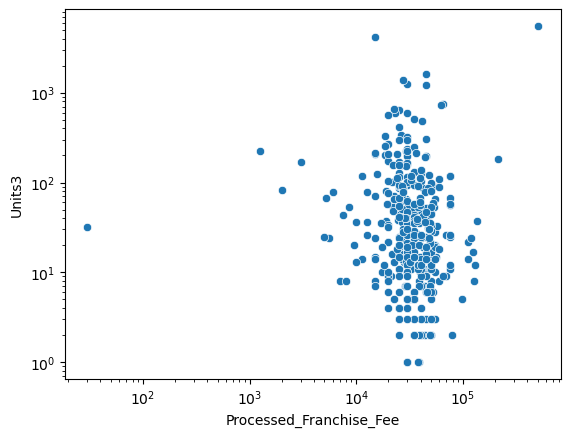

In [28]:
sns.scatterplot(data = new_df_3yr, x = 'Processed_Franchise_Fee', y = 'Units3')

# Set x-axis to logarithmic scale
plt.xscale('log')
plt.yscale('log')

# Show the plot
plt.show()

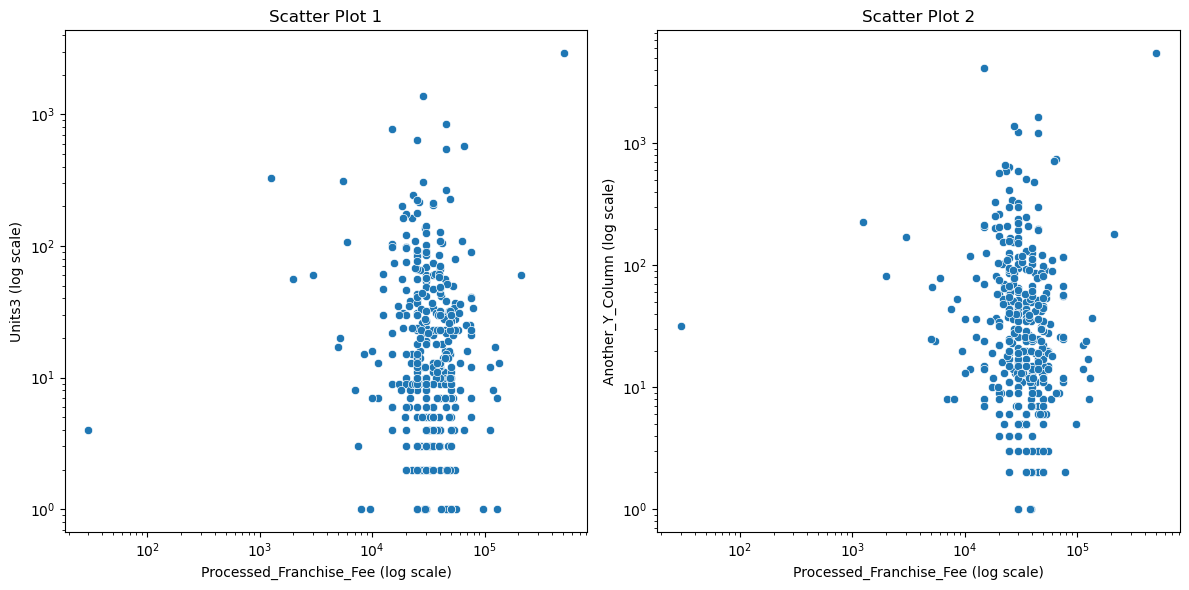

In [30]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot 1
sns.scatterplot(data=new_df_1yr, x= 'Processed_Franchise_Fee', y='Units1', ax=ax1)
ax1.set_title('Scatter Plot 1')
ax1.set_xlabel('Processed_Franchise_Fee (log scale)')
ax1.set_ylabel('Units3 (log scale)')
ax1.set_xscale('log')
ax1.set_yscale('log')

# Scatter plot 2
sns.scatterplot(data=new_df_3yr, x='Processed_Franchise_Fee', y='Units3', ax=ax2)
ax2.set_title('Scatter Plot 2')
ax2.set_xlabel('Processed_Franchise_Fee (log scale)')
ax2.set_ylabel('Another_Y_Column (log scale)')
ax2.set_xscale('log')
ax2.set_yscale('log')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


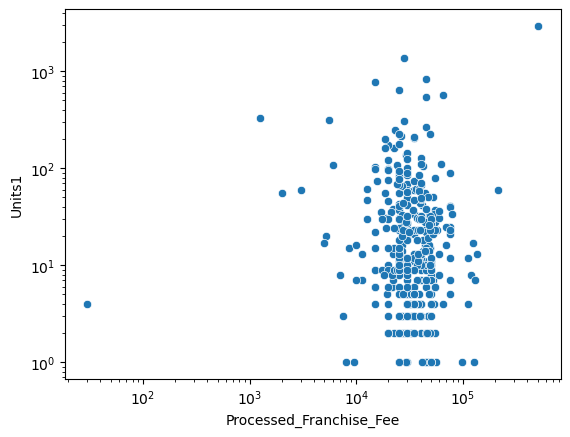

In [22]:
sns.scatterplot(data = new_df_1yr, x = 'Processed_Franchise_Fee', y = 'Units1')

# Set x-axis to logarithmic scale
plt.xscale('log')
plt.yscale('log')

# Show the plot
plt.show()

Time to check if we have any 'null's

Cleaning the data